<a href="https://colab.research.google.com/github/itzrubyy/student_mental_health_prediction/blob/main/student_mental_health_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
import warnings
warnings.filterwarnings('ignore')

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
df = pd.read_csv('Student Mental health.csv')

In [224]:
df.head(10)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [225]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [226]:
df.dropna(inplace = True, axis = 1)

In [227]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [228]:
#Change column name from Choose your gender to Gender

df.rename(columns = {'Choose your gender' : 'Gender'}, inplace = True)
df.rename(columns = {'What is your course?' : 'Course'}, inplace = True)
df.rename(columns = {'Your current year of Study' : 'Studying Year'}, inplace = True)
df.rename(columns = {'What is your CGPA?' : 'CGPA'}, inplace = True)

In [229]:
df.head()

,Timestamp,Gender,Course,Studying Year,CGPA,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [230]:
df.drop(['Timestamp'], axis = 1, inplace = True)

In [231]:
df.head()

,Gender,Course,Studying Year,CGPA,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [232]:
df["Studying Year"].value_counts()

Studying Year
year 1    41
Year 3    19
Year 2    16
year 2    10
year 4     8
year 3     5
Year 1     2
Name: count, dtype: int64

In [233]:
#making all value to lowercase
df["Studying Year"] = df["Studying Year"].str.lower()

In [234]:
df["Studying Year"].value_counts()

Studying Year
year 1    43
year 2    26
year 3    24
year 4     8
Name: count, dtype: int64

In [235]:
df["Studying Year"] = df["Studying Year"].map({'year 1': 1, 'year 2': 2, 'year 3': 3, 'year 4': 4})

In [236]:
df.head()

,Gender,Course,Studying Year,CGPA,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [237]:
#df["CGPA"] having values like 3.00-3.49 converting it into single continous value average of two

df['CGPA'] = df['CGPA'].str.split('-').apply(lambda x: (float(x[0]) + float(x[1])) / 2)

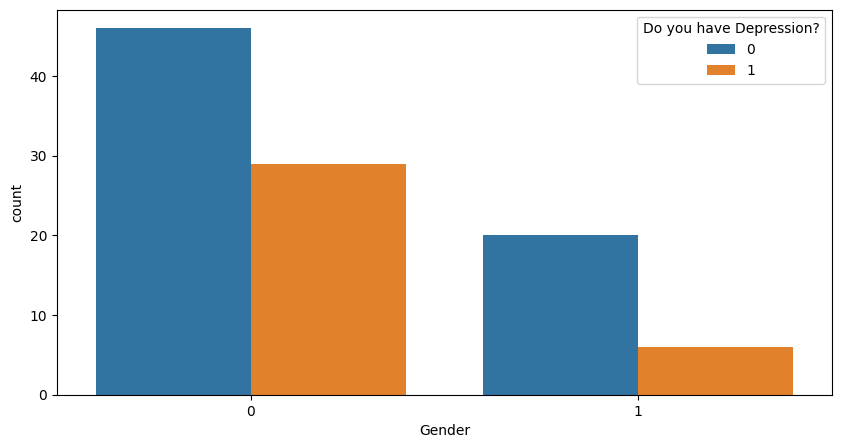

In [311]:
# Gender vs Depression plot

plt.figure(figsize = (10, 5))
sns.countplot(x = 'Gender', hue = 'Do you have Depression?', data = df)
plt.show()

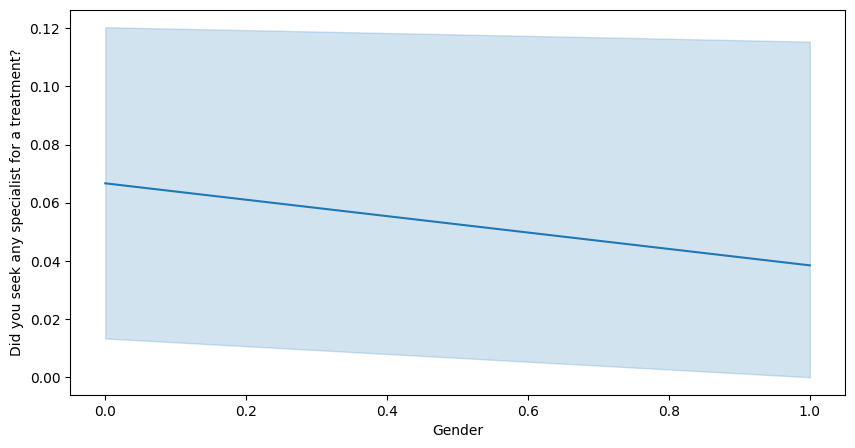

In [312]:
# line plot on gender vs did you seek any

plt.figure(figsize = (10, 5))
sns.lineplot(x = 'Gender', y = 'Did you seek any specialist for a treatment?', data = df)
plt.show()

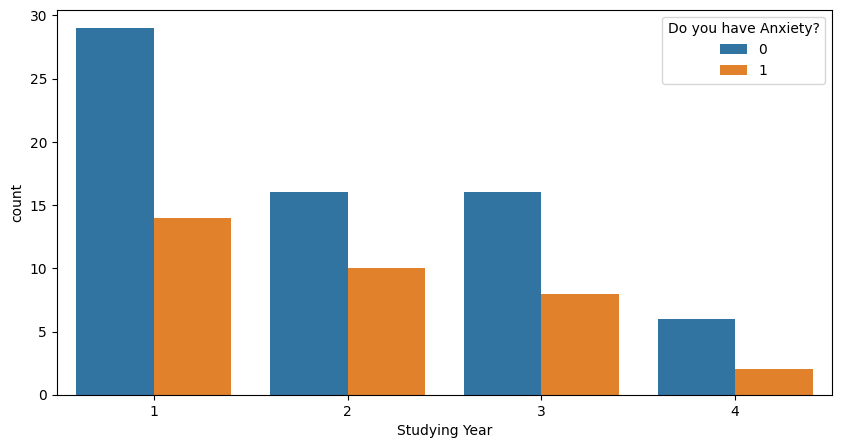

In [313]:
# Studying year vs Anxiety graph

plt.figure(figsize = (10, 5))
sns.countplot(x = 'Studying Year', hue = 'Do you have Anxiety?', data = df)
plt.show()

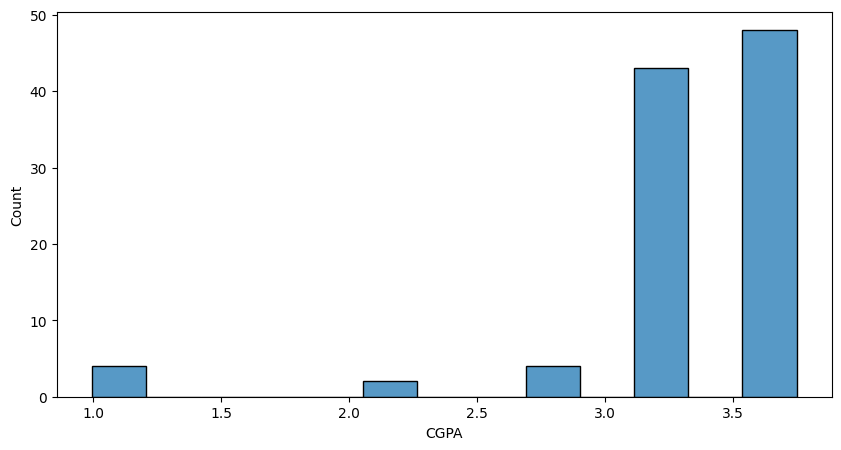

In [314]:
#histplot

plt.figure(figsize = (10, 5))
sns.histplot(x = 'CGPA', data = df)
plt.show()

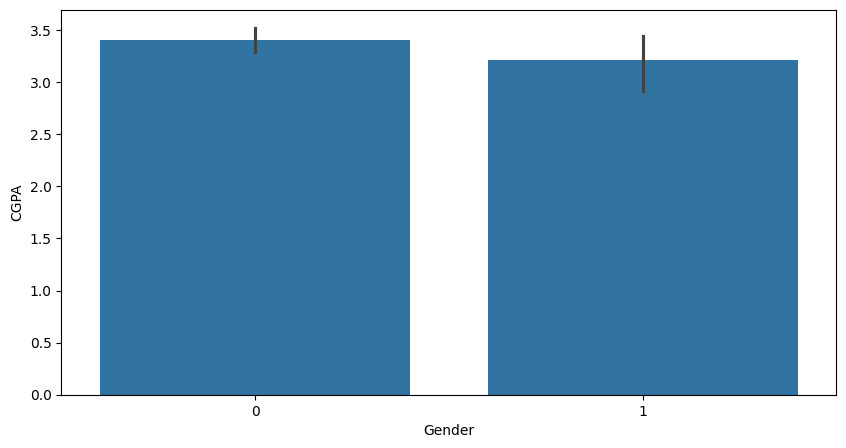

In [315]:
#bar chart

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Gender', y = 'CGPA', data = df)
plt.show()

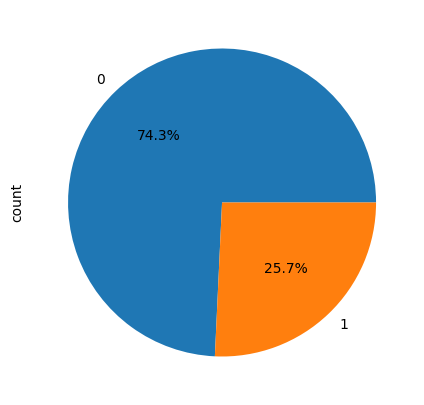

In [316]:
#piechart

plt.figure(figsize = (10, 5))
df['Gender'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

In [238]:
df.head()

,Gender,Course,Studying Year,CGPA,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,Engineering,1,3.245,No,Yes,No,Yes,No
1,Male,Islamic education,2,3.245,No,No,Yes,No,No
2,Male,BIT,1,3.245,No,Yes,Yes,Yes,No
3,Female,Laws,3,3.245,Yes,Yes,No,No,No
4,Male,Mathemathics,4,3.245,No,No,No,No,No


In [239]:
df["Marital status"].value_counts()

Marital status
No     85
Yes    16
Name: count, dtype: int64

In [240]:
df["Gender"].value_counts()

Gender
Female    75
Male      26
Name: count, dtype: int64

In [241]:
df["Do you have Depression?"].value_counts()

Do you have Depression?
No     66
Yes    35
Name: count, dtype: int64

In [242]:
df["Do you have Anxiety?"].value_counts()

Do you have Anxiety?
No     67
Yes    34
Name: count, dtype: int64

In [243]:
df["Do you have Panic attack?"].value_counts()

Do you have Panic attack?
No     68
Yes    33
Name: count, dtype: int64

In [244]:
df["Did you seek any specialist for a treatment?"].value_counts()

Did you seek any specialist for a treatment?
No     95
Yes     6
Name: count, dtype: int64

In [245]:
df["Course"].value_counts()

Course
BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Hum

In [246]:
# label encoding all

from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()

df["Gender"] = le1.fit_transform(df["Gender"])
df["Marital status"] = le2.fit_transform(df["Marital status"])
df["Do you have Depression?"] = le3.fit_transform(df["Do you have Depression?"])
df["Do you have Anxiety?"] = le4.fit_transform(df["Do you have Anxiety?"])
df["Do you have Panic attack?"] = le5.fit_transform(df["Do you have Panic attack?"])
df["Did you seek any specialist for a treatment?"] = le6.fit_transform(df["Did you seek any specialist for a treatment?"])

In [247]:
import pickle

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump([le1, le2, le3, le4, le5, le6], f)

In [248]:
X = df.drop('Did you seek any specialist for a treatment?', axis = 1)
y = df['Did you seek any specialist for a treatment?']

In [249]:
cat_features = X.select_dtypes(include = 'object').columns
cat_features

Index(['Course'], dtype='object')

In [250]:
num_features = X.select_dtypes(exclude = 'object').columns
num_features

Index(['Gender', 'Studying Year', 'CGPA', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?'],
      dtype='object')

In [251]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(
    drop='first',
    handle_unknown='ignore'
)

sc = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ('encoder', ohe, cat_features),
        ('scaler', sc, num_features)
    ],
    remainder='passthrough'
)


In [252]:
with open('sc.pkl', 'wb') as f:
    pickle.dump(sc, f)

In [253]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [255]:
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

In [256]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print(f"Num GPUs Available: {len(gpus)}")
    print(f"GPUs: {gpus}")
else:
    print("No GPU detected")

No GPU detected


In [257]:
y.value_counts()

Did you seek any specialist for a treatment?
0    95
1     6
Name: count, dtype: int64

In [258]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                3072      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5185 (20.25 KB)
Trainable params: 5185 (20.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [259]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [260]:
from scipy.sparse import csr_matrix

# Convert csr_matrix to SparseTensor
def csr_to_sparse_tensor(csr_mat):
  # Get the indices of non-zero values using nonzero()
  rows, cols = csr_mat.nonzero()
  indices = np.vstack((rows, cols)).transpose()
  # Create a SparseTensor
  sparse_tensor = tf.SparseTensor(indices=indices, values=csr_mat.data, dense_shape=csr_mat.shape)
  return sparse_tensor

In [261]:
X_train_processed = csr_to_sparse_tensor(X_train_processed)
X_test_processed = csr_to_sparse_tensor(X_test_processed)

In [262]:
with open('csr_to_sparse_tensor.pkl', 'wb') as f:
    pickle.dump(csr_to_sparse_tensor, f)

In [263]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [264]:
# Train the Artificial Neural Network with 10 level of patience

history = model.fit(
    X_train_processed, y_train,
    validation_data=(X_test_processed, y_test),
    epochs=100,
    # batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/100
3/3 [==============================] - 2s 94ms/step - loss: 0.7440 - accuracy: 0.4625 - val_loss: 0.6235 - val_accuracy: 0.8571
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 0.6798 - accuracy: 0.6500 - val_loss: 0.5956 - val_accuracy: 0.8571
Epoch 3/100
3/3 [==============================] - 0s 10ms/step - loss: 0.5931 - accuracy: 0.7500 - val_loss: 0.5709 - val_accuracy: 0.8571
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 0.6220 - accuracy: 0.7125 - val_loss: 0.5470 - val_accuracy: 0.9048
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 0.5873 - accuracy: 0.7500 - val_loss: 0.5246 - val_accuracy: 0.9048
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.5105 - accuracy: 0.8625 - val_loss: 0.5034 - val_accuracy: 0.9048
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 0.5376 - accuracy: 0.8500 - val_loss: 0.4842 - val_accuracy: 0.9048
Epoch 8/100
3/3 [====

In [265]:
print(f"Accuracy score of ANN: {history.history['accuracy'][-1]*100}%")

Accuracy score of ANN: 94.9999988079071%


In [266]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [267]:
df.head(1)

,Gender,Course,Studying Year,CGPA,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,0,Engineering,1,3.245,0,1,0,1,0


In [305]:
# Predict a test data

# creating a dataframe based on #     "Gender": "Male",
#     "Course": "Engineering",
#     "CGPA": "4",
#     "Marital status": "Yes",
#     "Do you have Depression?": "No",
#     "Do you have Anxiety?": "No",
#     "Do you have Panic attack?": "No",
#     "Studying Year": "2"

df_test = pd.DataFrame({
    "Gender": ["Male"],
    "Course": ["Engineering"],
    "Studying Year": ["2"],
    "CGPA": [4],
    "Marital status": ["Yes"],
    "Do you have Depression?": ["Yes"],
    "Do you have Anxiety?": ["Yes"],
    "Do you have Panic attack?": ["Yes"],
}, index=[0])

df_test.head()

,Gender,Course,Studying Year,CGPA,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?
0,Male,Engineering,2,4,Yes,Yes,Yes,Yes


In [306]:
df_test["Gender"]

0    Male
Name: Gender, dtype: object

In [307]:
with open('label_encoder.pkl', 'rb') as f:
    l1,l2,l3,l4,l5,l6 = pickle.load(f)

with open('sc.pkl', 'rb') as f:
    scs = pickle.load(f)

with open('model.pkl', 'rb') as f:
    models = pickle.load(f)

with open('preprocessor.pkl', 'rb') as f:
    preprocessors = pickle.load(f)

with open('csr_to_sparse_tensor.pkl', 'rb') as f:
    csr_to_sparse_tensors = pickle.load(f)

In [308]:
df_test["Gender"] = l1.transform(df_test["Gender"])
df_test["Marital status"] = l2.transform(df_test["Marital status"])
df_test["Do you have Depression?"] = l3.transform(df_test["Do you have Depression?"])
df_test["Do you have Anxiety?"] = l4.transform(df_test["Do you have Anxiety?"])
df_test["Do you have Panic attack?"] = l5.transform(df_test["Do you have Panic attack?"])

In [309]:
test_df = preprocessors.transform(df_test)

In [310]:
result = models.predict(test_df)

result[0][0]

if result[0][0] > 0.5:
    print("You should consult to a mental doctor right now :(")
else:
    print("You won't require any mental treatment :)")


1/1 [==============================] - 0s 103ms/step
You won't require any mental treatment :)
